In [1]:
import os
import seaborn
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
def get_test_and_val_results(path):
    base_dir = '../results'
    repeats = 5
    seeds = list(range(42, 42 + repeats))
    
    runs = [item for item in os.listdir(os.path.join(base_dir, path)) if not item.endswith('.yaml')]
    #runs = [r for r in runs if "dropout_0.0" in r]
    results = {}

    test_search_string = 'Test metrics: '
    val_search_string = 'Val metrics: '
    model_loaded_string = 'Model loaded for evaluation'
    for run in runs:
        for seed in seeds:
            cur_path = os.path.join(base_dir, path, run, str(seed), 'logging.log')
            test_stats = None
            val_stats = None
            model_loaded = False
            try:
                with open(cur_path, 'r') as f:
                    for line in f:
                        if model_loaded_string in line:
                            model_loaded = True  # Indicate that the next val metrics should be captured
                        elif val_search_string in line and model_loaded:
                            val_stats = line[len(val_search_string):]  # Capture val stats after model is loaded
                        elif test_search_string in line:
                            test_stats = line[len(test_search_string):]
                            break  # Stop reading the file once test metrics are found
            except Exception as e:
                print(f'Error reading {cur_path}: {e}')
                continue
            
            if test_stats is None or val_stats is None:
                print(f'{run} with seed {seed} does not have complete stats')
                continue
            
            # Safely evaluate the dictionary strings
            try:
                test_stats_eval = eval(test_stats)
                val_stats_eval = eval(val_stats)
                results[f"{run}_seed_{seed}"] = {"test": test_stats_eval, "val": val_stats_eval, "run": run}
            except SyntaxError as e:
                print(f'Error evaluating stats for {run} with seed {seed}: {e}')
    
    return results


# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'stackex-engage-attn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_model.aggr_sum_mean_max'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_model.hetero_aggr_sum_mean_max'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_loader.num_neighbors_16_32_64_128_256'
# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.use_self_join_True_False_model.aggr_sum_mean_max'
# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.use_self_join_True_False_loader.num_neighbors_16_32_64_128_256'
# yaml_collection_path = 'amazon_ltv_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_product_churn_model.channels_64_128_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_4_model.use_self_join_True_False'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.num_layers_2_3_4_model.use_self_join_True_False'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_loader.temporal_strategy_uniform_last'
#yaml_collection_path = 'stackex-engage_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_loader.temporal_strategy_uniform_last'

#yaml_collection_path = 'f1-dnf-sj_model.channels_64_128_256_model.conv_sage_gat_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sj_model.channels_64_128_256_model.conv_sage_gat_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sj_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sj_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'

#yaml_collection_path = 'stackex-badges-sj_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sj-sim-fix_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sj-sim-fix_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001_OLD'
#yaml_collection_path = 'f1-dnf-sj-sim-fix_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'

#yaml_collection_path = 'f1-dnf-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-badges-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-engage-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-badges-sj_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'

#yaml_collection_path = 'f1-qualifying-sjr_model.channels_64_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_0.2_0.5_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sjr_model.channels_64_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_0.2_0.5_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sjr_model.channels_64_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_model.dropout_0.0_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-engage-sjr_model.channels_64_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sjr_model.channels_64_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_selfjoin.memory_bank_size_1024_4096_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sjr_model.channels_64_128_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_selfjoin.memory_bank_size_1024_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sjr_model.channels_64_128_model.num_layers_2_model.use_self_join_with_retrieval_False_model.dropout_0.0_model.feature_dropout_0.0_0.1_0.2_0.3_selfjoin.memory_bank_size_1024_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-qualifying-sjr_model.channels_64_128_model.num_layers_2_model.use_self_join_with_retrieval_True_model.dropout_0.0_model.feature_dropout_0.0_0.1_0.2_0.3_selfjoin.memory_bank_size_1024_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf-sjr_model.channels_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_model.feature_dropout_0.0_0.2_selfjoin.memory_bank_size_2048_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-engage-sjr_model.channels_128_256_model.num_layers_2_model.use_self_join_with_retrieval_True_False_model.dropout_0.0_model.feature_dropout_0.0_0.2_selfjoin.memory_bank_size_2048_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-dnf_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001'
#TASK_TYPE = 'classification'

#yaml_collection_path = 'f1-position-sj_model.channels_64_128_256_model.conv_sage_gat_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'f1-position-sj_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'

#yaml_collection_path = 'f1-position-sj-sim-fix_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
#yaml_collection_path = 'stackex-votes-sj-sim-sup_model.channels_64_128_256_model.conv_sage_model.num_layers_2_model.use_self_join_True_False_optim.base_lr_0.01_0.001'

#yaml_collection_path = 'f1-position_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001'
yaml_collection_path = 'stackex-votes_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001'
TASK_TYPE = 'regression'

assert TASK_TYPE in ['regression', 'classification']
res = get_test_and_val_results(yaml_collection_path)



hparams =  {
        'model.channels': [128, 256],
        # 'model.conv': ['sage', 'gat'],
        #'model.num_layers': [2],
        #'model.use_self_join_with_retrieval': [True, False],
        # 'model.aggr': ['sum', 'mean', 'max'],
        #'model.dropout': [0.0],
        'model.feature_dropout': [0.0, 0.2, 0.4],
        #'selfjoin.memory_bank_size': [1024],
        #'selfjoin.num_filtered': [32, 128, 512],
        # 'model.hetero_aggr': ['sum', 'mean', 'max'],
        'optim.base_lr': [0.01, 0.001],
        # 'loader.num_neighbors': [16, 32, 64, 128, 256],
        # 'loader.temporal_strategy': ['uniform', 'last']
        # 'selfjoin.node_type_considered': ['drivers', None],
        # 'selfjoin.num_filtered': [10, 20, 50],
        #'selfjoin.sim_score_type': [None, 'cos', 'L2', 'attention'],
        # 'selfjoin.aggr_scheme': ['gat', 'mpnn'],
        # 'selfjoin.normalize_score': [True, False],
    }

for key in res:
    print(key, '   ', res[key])
#param_to_plot = 'model.use_self_join_with_retrieval'
param_to_plot = 'model.feature_dropout'

a = []
if TASK_TYPE == 'classification':
    columns = [param_to_plot, 'average_precision', 'accuracy', 'f1', 'roc_auc']  # classification
    ascending = False
elif TASK_TYPE == 'regression':
    columns = [param_to_plot, 'mae', 'rmse']  # regression
    ascending = True
    
val_columns = [f"val_{c}" for c in columns]
cnt = 0
for value in hparams[param_to_plot]:
    name = param_to_plot + '_' + str(value)
    for exp_name in res:
        if name not in exp_name:
            continue
        cur_res_test, cur_res_val = res[exp_name]['test'], res[exp_name]['val']
        
        cur_a_test = [value]
        cur_a_val = [value]
        for col in columns[1:]:
            cur_a_test.append(cur_res_test[col])
            cur_a_val.append(cur_res_val[col])

        a.append(cur_a_test + cur_a_val + [res[exp_name]['run']])

a = pd.DataFrame(data=a, columns=columns + val_columns + ['run'])
print(a)
        

stackex-votes_model.channels_256_model.feature_dropout_0.4_optim.base_lr_0.01_run with seed 42 does not have complete stats
Error reading ../results/stackex-votes_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001/stackex-votes_model.channels_256_model.feature_dropout_0.4_optim.base_lr_0.01_run/43/logging.log: [Errno 2] No such file or directory: '../results/stackex-votes_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001/stackex-votes_model.channels_256_model.feature_dropout_0.4_optim.base_lr_0.01_run/43/logging.log'
Error reading ../results/stackex-votes_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001/stackex-votes_model.channels_256_model.feature_dropout_0.4_optim.base_lr_0.01_run/44/logging.log: [Errno 2] No such file or directory: '../results/stackex-votes_model.channels_128_256_model.feature_dropout_0.0_0.2_0.4_optim.base_lr_0.01_0.001/stackex-votes_model.channels_256_model.feature_dro

In [28]:
for run, size in a.groupby("run").size().items():
    if size<5:
        print(f"Run: {run} has {size} runs, consider re-running this config")

Run: stackex-votes_model.channels_128_model.feature_dropout_0.4_optim.base_lr_0.001_run has 1 runs, consider re-running this config
Run: stackex-votes_model.channels_256_model.feature_dropout_0.0_optim.base_lr_0.01_run has 4 runs, consider re-running this config
Run: stackex-votes_model.channels_256_model.feature_dropout_0.2_optim.base_lr_0.01_run has 4 runs, consider re-running this config


In [3]:
import numpy as np 

def get_test_of_best_val(df, y, ascending, param_to_plot):
    grouped = df.groupby(param_to_plot)
    results = {}
    for group_name, group_data in grouped:
        results[group_name] = get_mean_and_ci(group_data, y, ascending)
        
    return results


def get_mean_and_ci(df, y, ascending):
    # Calculate the mean and standard deviation of 'AP' and f'val_{y}' for each 'run'
    grouped = df.groupby('run').agg({y: ['mean', 'std', 'size'], f"val_{y}": ['mean', 'std', 'size']})
    
    grouped.fillna(0, inplace=True) # some std are 0 if there is only 1 sample

    # Calculate the 95% confidence interval for 'AP' based on the std deviation and sample size
    grouped[(y, '95% CI')] = 1.96 * grouped[(y, 'std')] / np.sqrt(grouped[(y, 'size')])
    grouped[(f"val_{y}", '95% CI')] = 1.96 * grouped[(f"val_{y}", 'std')] / np.sqrt(grouped[(f"val_{y}", 'size')])

    # Sort the groups by the mean of f'val_{y}' in descending order
    sorted_groups = grouped.sort_values(by=(f"val_{y}", 'mean'), ascending=ascending)

    # Select the group with the largest mean of f'val_{y}'
    largest_group = sorted_groups.head(1)

    # Get the mean and standard deviation of 'AP' for the largest group
    mean = largest_group[(y, 'mean')].iloc[0]
    ci = largest_group[(y, '95% CI')].iloc[0]
    
    val_mean = largest_group[(f"val_{y}", 'mean')].iloc[0]
    val_ci = largest_group[(f"val_{y}", '95% CI')].iloc[0]
    
    
    return mean, ci, val_mean, val_ci

def plot_mean_and_ci(mean_and_ci_dict, y, param_to_plot):
    x_values = list(mean_and_ci_dict.keys())
    means = [value[0] for value in mean_and_ci_dict.values()]
    errors = [value[1] for value in mean_and_ci_dict.values()]
    print('Test')
    print(means)
    print(errors)
    
    val_means = [value[2] for value in mean_and_ci_dict.values()]
    val_errors = [value[3] for value in mean_and_ci_dict.values()]
    print('Val')
    print(val_means)
    print(val_errors)
    plt.errorbar(x_values, means, yerr=errors, fmt='o', capsize=5)
    plt.xlabel(param_to_plot)
    plt.ylabel(y)
    plt.title('Mean and 95% Confidence Interval')
    plt.show()



In [4]:


def get_test_of_best_val_df(df, y, ascending, param_to_plot):
    grouped_results = df.groupby(param_to_plot).apply(get_test_of_best_val, y=y, ascending=ascending, param_to_plot=param_to_plot)

    # Reset index if necessary
    grouped_results = grouped_results.reset_index(drop=True)

    return grouped_results

===========       OVER ALL SEEDS       ===========


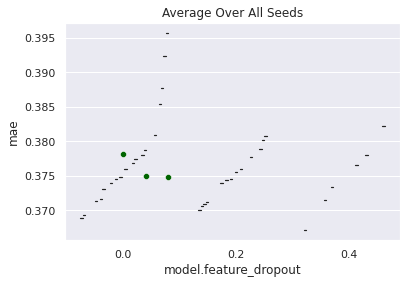

   model.feature_dropout       mae
0                    0.0  0.378151
1                    0.2  0.374967
2                    0.4  0.374788
===========       END       ===========


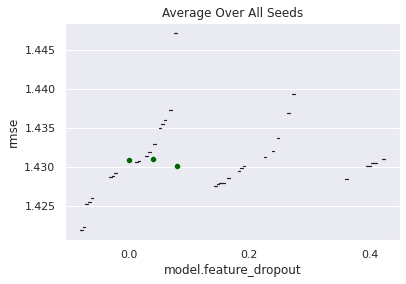

   model.feature_dropout      rmse
0                    0.0  1.430897
1                    0.2  1.430953
2                    0.4  1.430104
===========       END       ===========
===========       OVER TOP K VAL       ===========
Test
[0.37304486371404794, 0.3742619224665523, 0.3733025677898478]
[0.0014231149203639657, 0.003563071557295049, 0.0037985298483027142]
Val
[0.4851111923984016, 0.48566357332446114, 0.4859744342959879]
[0.0012877001331024747, 0.001403683367848786, 0.0011813212039269183]


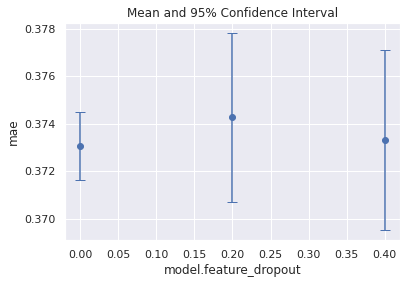

Test
[1.4327095354132326, 1.4300992679427058, 1.4304996280866331]
[0.0104425455268427, 0.0034100840666182472, 0.0]
Val
[2.230233697586015, 2.233918271745569, 2.2311518081912705]
[0.0050194314870122695, 0.0016410923233024471, 0.0]


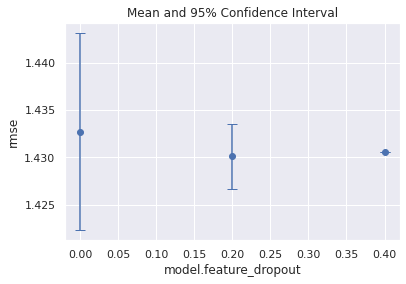

In [5]:
import copy 

%matplotlib inline
seaborn.set(style="darkgrid")

def plot(data, y, param_to_plot, title):
    #print(data.groupby(param_to_plot)[y])
    plt.figure()
    ax = seaborn.violinplot(data=data, 
                         y=y,
                         hue=y,
                         legend=False,
                         x=param_to_plot, palette="Blues", whis=(0, 100))
    ax.set_title(title)

    # Calculate the means
    means = data.groupby(param_to_plot)[y].mean().reset_index()

    # Use pointplot to overlay the mean values on the same axes
    seaborn.scatterplot(data=means, y=y, x=param_to_plot, markers='D', color='darkgreen', ax=ax)


    plt.show()
    
    print(means)
    print("===========       END       ===========")


if TASK_TYPE == 'classification':
    print("==================================================")
    print("===========       OVER ALL SEEDS       ===========")
    print("==================================================")
    plot(a, 'average_precision', param_to_plot, title="Average Over All Seeds")
    plot(a, 'roc_auc', param_to_plot, title="Average Over All Seeds")

    print("==================================================")
    print("===========       OVER TOP K VAL       ===========")
    print("==================================================")
    
    results = get_test_of_best_val(a, "average_precision", ascending, param_to_plot)
    plot_mean_and_ci(results, "average_precision", param_to_plot)


    results = get_test_of_best_val(a, "roc_auc", ascending, param_to_plot)
    plot_mean_and_ci(results, "roc_auc", param_to_plot)
    
    
    results = get_test_of_best_val(a, "accuracy", ascending, param_to_plot)
    plot_mean_and_ci(results, "accuracy", param_to_plot)
    
elif TASK_TYPE == 'regression':
    print("==================================================")
    print("===========       OVER ALL SEEDS       ===========")
    print("==================================================")
    plot(a, 'mae', param_to_plot, title="Average Over All Seeds")
    plot(a, 'rmse', param_to_plot, title="Average Over All Seeds")
    
    print("==================================================")
    print("===========       OVER TOP K VAL       ===========")
    print("==================================================")
    
    results = get_test_of_best_val(a, "mae", ascending, param_to_plot)
    plot_mean_and_ci(results, "mae", param_to_plot)


    results = get_test_of_best_val(a, "rmse", ascending, param_to_plot)
    plot_mean_and_ci(results, "rmse", param_to_plot)
    
    
    